In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

import tensorflow as tf

In [2]:
!pip install -q -U tf-hub-nightly
import tensorflow_hub as hub

from tensorflow.keras import layers

In [12]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" #@param {type:"string"}


In [15]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])


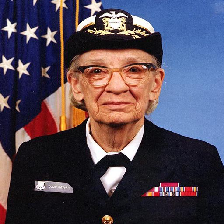

In [16]:
import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper


In [17]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [18]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [19]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

In [20]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())


16384/10484 [==============================================] - 0s 1us/step


In [34]:
labels_path2 = '/home/furkan/Desktop/labels.txt'
imagenet_labels2 = np.array(open(labels_path2).read().splitlines())

IndexError: index 653 is out of bounds for axis 0 with size 35

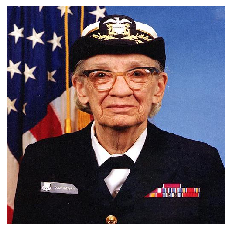

In [35]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name2 = imagenet_labels2[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name2.title())


In [23]:
data_root = '/home/furkan/Desktop/pictures/'

In [24]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)


Found 14620 images belonging to 5 classes.


In [25]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break


Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [26]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [27]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['digital clock', 'digital clock', 'space shuttle', 'traffic light',
       'space shuttle', 'nail', 'space shuttle', 'digital clock',
       'digital clock', 'hook', 'analog clock', 'hook', 'book jacket',
       'sidewinder', 'hook', 'switch', 'traffic light', 'street sign',
       'digital clock', 'digital clock', 'street sign', 'horned viper',
       'digital clock', 'street sign', 'digital clock', 'street sign',
       'space shuttle', 'space shuttle', 'bell cote', 'traffic light',
       'nail', 'street sign'], dtype='<U30')

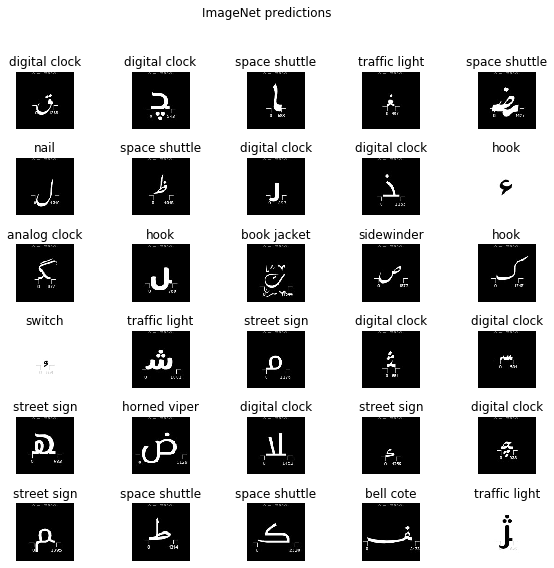

In [30]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")
